# Alternative splicing events
Isotools defines alternative splicing events (ASE) with a graph based approach. 
The Transcriptome method [alternative_splicing_events](../isotoolsAPI.html?highlight=alternative_splicing_events#isotools.Transcriptome.alternative_splicing_events) finds all ASE, classifies them by type and quantifies them with the PSI per sample.
We distinguish 5 different event types:

* Exon Skipping(ES), 
* Intron Retention (IR), 
* Mutually Exclusive Exons(ME), 
* 3' Alternative Splicing (3AS), 
* 5' Alternative Splicing (5AS), 
* Alternative First Exons (TSS), and 
* Alternative Last Exons (PAS).

![ASE](alternative_events.png)

In this tutorial, we learn to use ASE to calculate 2D embeddings (PCA, UMAP), representing the relation of the samples with respect to alternative splicing. 
This representation may be a useful as a first step of the analysis, to validate hypothesis and check sample integrity. 

To run this tutorial, download the transcriptome object file 'PacBio_isotools_substantial_isotools.pkl' from [here](https://nc.molgen.mpg.de/cloud/index.php/s/zYe7g6qnyxGDxRd) to a subfolder 'demonstration_dataset'.

In [1]:
from isotools import Transcriptome
import matplotlib.pyplot as plt

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools_substantial_isotools.pkl')

This is isotools version 0.3.3, but data has been pickled with version 0.3.2rc2, which may be incompatible


In [2]:
# compute the alternative splicng events
splice_events=isoseq.alternative_splicing_events()
# count the identified events by type
splice_events.splice_type.value_counts()

TSS    391
PAS    254
ES     109
IR      78
5AS     54
3AS     37
ME       8
Name: splice_type, dtype: int64

## PCA plots
The 2-dimensional embedding of the alternative splicing events can be depicted with the [plot_embedding](../isotoolsAPI.html?highlight=plot_embedding#isotools.plots.plot_embedding) functionality. 
Currently, PCA and UMAP embedding are implemented. 

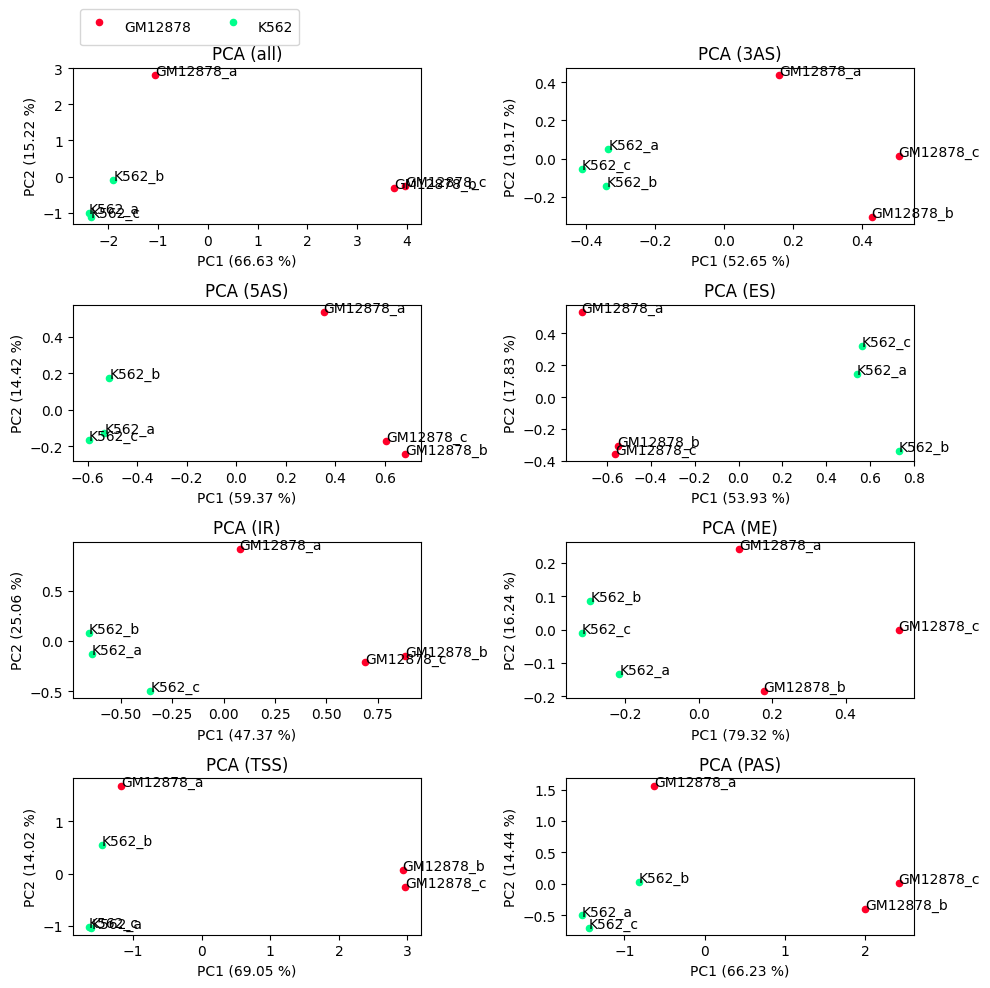

In [3]:
#plot PCA embedding
from isotools.plots import plot_embedding
plt.rcParams["figure.figsize"] = (10,10)

pca={}

f,axs=plt.subplots(4,2)
for ax,t in zip(axs.flatten(),['all','3AS','5AS','ES','IR','ME', 'TSS', 'PAS']):
    pca[t]=plot_embedding(splice_events, 
                          ax=ax, 
                          labels=True, 
                          groups=isoseq.groups(), 
                          splice_types=t)


axs[0,0].legend(fontsize='medium', ncol=4,handleheight=2.4, labelspacing=0.05, 
                bbox_to_anchor=(0, 1.1), loc='lower left')
plt.tight_layout()



While the samples cluster as expected, e.g. the groups cluster together, it seems like sample GM12878_a is diverging from the two other samples of the same group. This could indicate quality issues for this sample.